# Iris

### Importando as bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as scp
import warnings
from sklearn import datasets
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier  
warnings.filterwarnings("ignore")

### Importando o dataset

In [ ]:
from google.colab import files

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"settebr","key":"71798c39421b8856910ad34ae19ae95f"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d uciml/iris
!mkdir -p data/iris
!unzip iris.zip -d data/iris

  0% 0.00/3.60k [00:00<?, ?B/s]
100% 3.60k/3.60k [00:00<00:00, 2.56MB/s]
Archive:  iris.zip
  inflating: data/iris/Iris.csv      
  inflating: data/iris/database.sqlite  


In [ ]:
df = pd.read_csv("data/iris/Iris.csv",index_col="Id")

### Explorando o dataset

In [ ]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [ ]:
df.describe()             

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Split do dataset

In [ ]:
X = df.drop('Species', axis=1)
y = df['Species']

In [ ]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2


### Train Test Split

#### Nesta fase separamos o conjunto de dados em Treinamento e Teste, definindo o percentual que utilizaremos para teste e para treino do modelo

In [ ]:

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3,random_state=42)

### Feature Scaling

#### Normaliza valores para media zero e desvio padrão 1


In [ ]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test) 

In [ ]:
df_train = pd.DataFrame(X_train,index=X_train[:,0])

In [ ]:
display(df_train)

,0,1,2,3
-0.413416,-0.413416,-1.464401,-0.100146,-0.321500
0.551222,0.551222,-0.495821,0.717711,0.353650
0.671802,0.671802,0.230614,0.951384,0.758740
0.912961,0.912961,-0.011531,0.308783,0.218620
1.636440,1.636440,1.441340,1.301894,1.703949
...,...,...,...,...
0.310062,0.310062,-0.495821,0.075109,0.083590
-1.136895,-1.136895,-1.222256,0.367201,0.623710
-0.051677,-0.051677,2.409921,-1.560604,-1.401739
-0.051677,-0.051677,-0.980111,0.075109,-0.051440


In [ ]:
df_train.describe()

,0,1,2,3
count,1.050000e+02,1.050000e+02,1.050000e+02,1.050000e+02
mean,3.679596e-16,4.906789e-18,-3.172066e-17,-2.537653e-17
std,1.004796e+00,1.004796e+00,1.004796e+00,1.004796e+00
min,-1.860374e+00,-2.432982e+00,-1.619022e+00,-1.536769e+00
25%,-8.957355e-01,-4.958210e-01,-1.268512e+00,-1.131680e+00
50%,-5.167705e-02,-1.153072e-02,2.503642e-01,8.358997e-02
75%,6.718016e-01,4.727595e-01,7.177108e-01,7.587397e-01
max,2.239339e+00,2.894211e+00,1.652404e+00,1.703949e+00


### KNN Model

#### Agora iremos aplicar nossos dados ao algoritmo KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier  

classifier = KNeighborsClassifier(n_neighbors=5)  
classifier.fit(X_train, y_train)  

KNeighborsClassifier()

In [ ]:
y_pred = classifier.predict(X_test) 

### Avaliando o Algoritmo
##### Analisando e validando os resultados obtidos

In [ ]:
from sklearn.metrics import classification_report

print("Relatório de classificação: \n", classification_report(y_test, y_pred))  


Relatório de classificação: 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      1.00      1.00        17
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



### Loop para gerar testes com diferentes valores de visinho (K)

In [ ]:
from tqdm import tqdm
error = []

for i in tqdm(range(1, 20, 2)):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

100%|██████████| 10/10 [00:00<00:00, 208.66it/s]


### Comparando o Error Rate gerado de valores K diferentes

Text(0, 0.5, 'Mean Error')

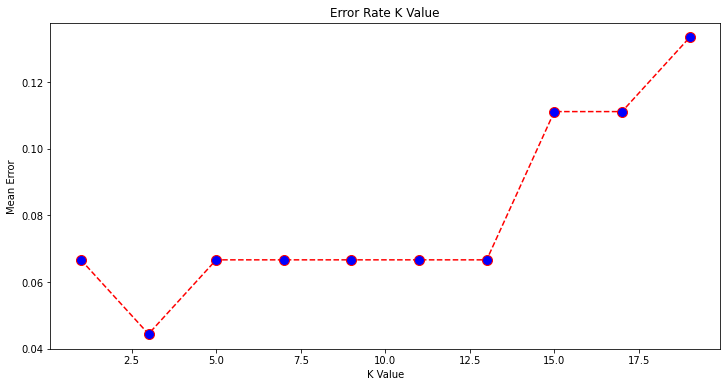

In [ ]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 20,2), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  

### Aplicando melhor parâmetro para K encontrado

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=3)  
classifier.fit(X_train, y_train)  

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = classifier.predict(X_test) 

In [ ]:
print("Relatório de classificação: \n", classification_report(y_test, y_pred))  

Relatório de classificação: 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        20
Iris-versicolor       1.00      0.87      0.93        15
 Iris-virginica       0.83      1.00      0.91        10

       accuracy                           0.96        45
      macro avg       0.94      0.96      0.95        45
   weighted avg       0.96      0.96      0.96        45



# Wine 

(178, 13)
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


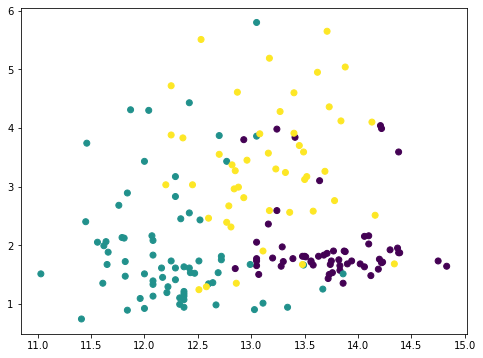

In [ ]:

wine = datasets.load_wine()

print(wine.data.shape)
print(wine.feature_names)

X = wine.data[:, :2]
y = wine.target

plt.figure(2, figsize=(8,6))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3, random_state=42)

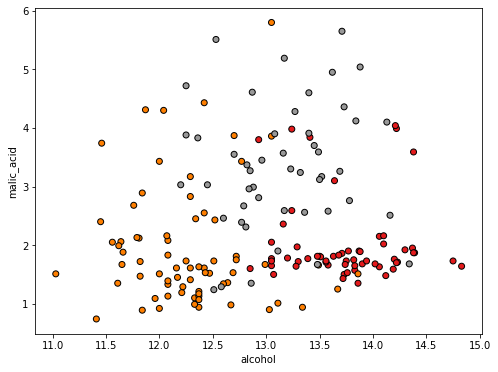

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
import sklearn.datasets as skdata
import pandas as pd
from sklearn.model_selection import cross_validate

plt.figure(2, figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel(wine.feature_names[0])
plt.ylabel(wine.feature_names[1])
plt.show()



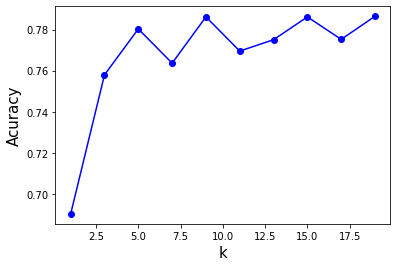

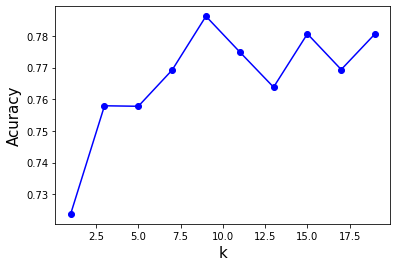

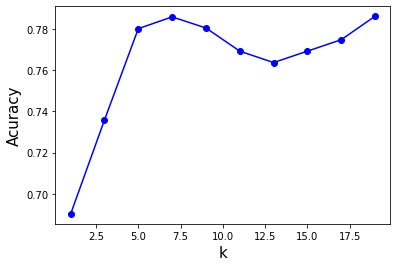

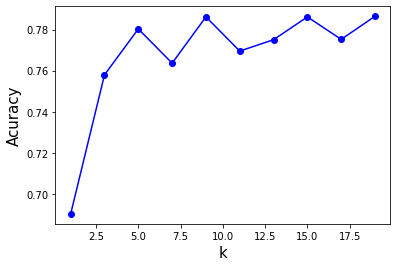

In [ ]:
nkf = 5 # Numero de folds
for dist in ['euclidean', 'manhattan', 'chebyshev', 'minkowski']:
  vk = [] # Armazena os valores de k
  vscore = []
  for k in range(1, 20,2):
      model = KNeighborsClassifier(n_neighbors=k, metric = dist)
      cv = cross_validate(model, X, y, cv=nkf)
      vscore.append(cv['test_score'].mean())
      vk.append(k)

  plt.figure(figsize=(6,4))
  plt.plot(vk, vscore, '-bo')
  plt.xlabel('k', fontsize = 15)
  plt.ylabel('Acuracy', fontsize = 15)
  plt.show(True)

In [ ]:
import threading
threading.active_count()

10

In [ ]:
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier(n_jobs=10)

k_range = list(range(1, 31))
all_metrics = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']
param_grid = dict(n_neighbors=k_range, metric=all_metrics)
  
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
print(knn.get_params().keys())

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])


In [ ]:
grid_search=grid.fit(X_train, y_train)

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


In [ ]:
print(grid_search.best_params_)

{'metric': 'manhattan', 'n_neighbors': 1}


In [ ]:
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

Accuracy for our training dataset with tuning is : 78.40%


In [ ]:
knn = KNeighborsClassifier(n_neighbors=1,metric="manhattan")

knn.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=1)

In [ ]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,accuracy_score
y_pred=knn.predict(X_test) 

test_accuracy=accuracy_score(y_test,y_pred)*100

print("Accuracy for our testing dataset with tuning is : {:.2f}%".format(test_accuracy) )


Accuracy for our testing dataset with tuning is : 85.19%


In [ ]:
import seaborn as sns

def plot_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    sns.set(font_scale=1.4)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d", annot_kws={"size": 16})
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return 

Acc teste:  0.8518518518518519
[[17  1  1]
 [ 2 17  2]
 [ 1  1 12]]
None


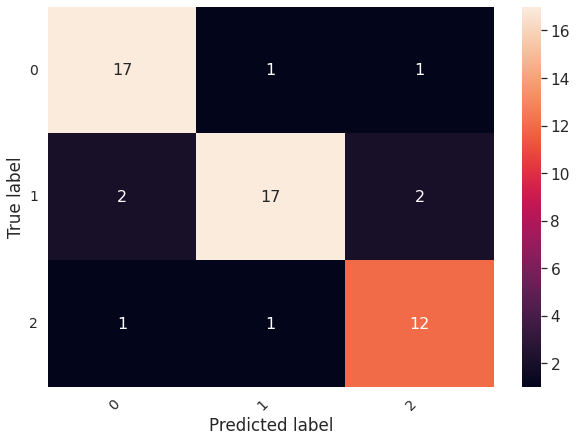

In [ ]:
print("Acc teste: ", accuracy_score(y_test,y_pred))
cf = confusion_matrix(y_test, y_pred)
print(cf)
print(plot_confusion_matrix(cf,class_names=["0","1","2"]))